In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydrophone_data_processing import load, preprocessing
import glob
import obspy

inventory = obspy.read_inventory('fdsn-station_2021-06-29T11_00_50.xml', format="STATIONXML")
channels = inventory.networks[0].get_contents()['channels']
networkdf = pd.DataFrame([inventory.get_coordinates(seed_id=id) for id in channels], index=[id for id in channels])
networkdf['station'] = [c.split('.')[1] for c in channels]
networkdf['component'] = [c.split('.')[-1] for c in channels]

In [2]:
event = 2 # 2

In [3]:
stations = !ls /media/sda/data/robdata/PASSCAL/Main_deployment/DAYS/

In [4]:
dataloc = '/media/sda/data/robdata/PASSCAL/Main_deployment/DAYS/'


paths = [glob.glob(dataloc+station+'/*GHZ*.011') for station in stations]
for i, p in enumerate(paths):
    if len(p) == 0:
        paths.pop(i)
paths = np.array(paths).flatten()

In [5]:
stream = load.get_raw_stream(paths)


In [6]:
if event == 1:
    stream.trim(starttime=obspy.UTCDateTime('2020-01-11T14:30:00')
               ,endtime=obspy.UTCDateTime('2020-01-11T15:30:00'))
elif event == 2:
    stream.trim(starttime=obspy.UTCDateTime('2020-01-11T19:00:00')
               ,endtime=obspy.UTCDateTime('2020-01-11T20:00:00'))
elif event == 3:
    stream.trim(starttime=obspy.UTCDateTime('2020-01-11T19:45:00')
           ,endtime=obspy.UTCDateTime('2020-01-11T19:51:00'))
else:
    stream.trim(starttime=obspy.UTCDateTime('2020-01-11T12:00:00'))


In [7]:
stream.decimate(factor=2)

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [8]:
stream.detrend('demean')

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [9]:
stream.filter(type='highpass', corners=4, freq=40, zerophase=True)

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 500.0 Hz, 1800001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [10]:
for tr in stream:
    tr.data = np.abs(tr.data)
stream.decimate(factor=5, no_filter=True)

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 100.0 Hz, 360001 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 100.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [11]:
for tr in stream:
    print(tr.stats)
    break

         network: 7F
         station: A12
        location: 
         channel: BHZ
       starttime: 2020-01-11T19:00:00.000000Z
         endtime: 2020-01-11T20:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 360001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1344, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 99962880})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2020, 1, 11, 20, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 1, 11, 19, 0))', "ObsPy 1.2.2: filter(options={'freq': 250.0, 'maxorder': 12}::type='lowpass_cheby_2')", 'ObsPy 1.2.2: decimate(factor=2::no_filter=False::strict_length=False)', "ObsPy 1.2.2: detrend(options={}::type='demean')", "ObsPy 1.2.2: filter(options={'corners': 4, 'freq': 40, 'zerophase': True}::type='highpass')", 'ObsPy 1.2.2: decimate(factor=5::no_filter=True::strict_length=

In [12]:
stream.filter(type='lowpass', corners=4, zerophase=True, freq=0.5)

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 100.0 Hz, 360001 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 100.0 Hz, 360001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

(2800.0, 3200.0)

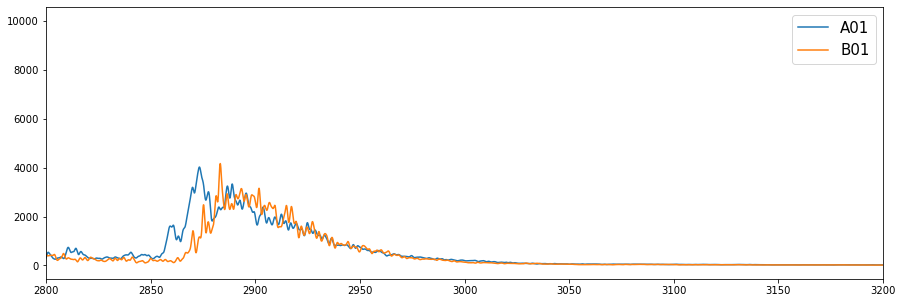

In [21]:
A01 = stream.select(id='7F.A01..BHZ')[0]
B01 = stream.select(id='7F.B01..BHZ')[0]

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(A01.times(), A01.data, label='A01')
ax.plot(B01.times(), B01.data, alpha=1, label='B01')

ax.legend(fontsize=15)
# ax.set_xlim(2410, 2450)
# ax.set_xlim(1800, 2300)
ax.set_xlim(2800, 3200)

In [14]:
A01

7F.A01..BHZ | 2020-01-11T19:00:00.000000Z - 2020-01-11T20:00:00.000000Z | 100.0 Hz, 360001 samples

In [11]:
stream.decimate(factor=10, no_filter=True)

38 Trace(s) in Stream:

7F.A12..BHZ | 2020-01-11T19:45:00.000000Z - 2020-01-11T19:51:00.000000Z | 10.0 Hz, 3601 samples
...
(36 other traces)
...
7F.B20..BHZ | 2020-01-11T19:45:00.000000Z - 2020-01-11T19:51:00.000000Z | 10.0 Hz, 3601 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [12]:
# stream.decimate(factor=10, no_filter=True)

In [13]:
# stream.decimate(factor=10, no_filter=True)

In [14]:
# # windows = stream.slide(window_length=10, step=10)
# windows = stream.slide(window_length=1, step=1)

# for w in windows:
#     print([tr.data[0] for tr in w])
#     break

In [15]:
# use decimate instead of max
# windows = stream.slide(window_length=10, step=10)
# windows = stream.slide(window_length=1, step=1)
windows = stream.slide(window_length=0.1, step=0.1)

maxamp_df = pd.DataFrame()

for w in windows:
    stations = [tr.stats.station for tr in w]
    amps = np.array([tr.data[0] for tr in w])
    row = dict(zip(stations, amps))
    wdf = pd.DataFrame(row, index=(pd.to_datetime(str(w[0].stats.starttime)),))
    maxamp_df = pd.concat([maxamp_df, wdf])

In [16]:
# windows = stream.slide(window_length=10, step=10)
# # windows = stream.slide(window_length=60, step=60)

# maxamp_df = pd.DataFrame()

# for window in windows:
#     stations = [tr.stats.station for tr in window]
#     ampmax = window.max()
#     row = dict(zip(stations, ampmax))
#     wdf = pd.DataFrame(row, index=[pd.to_datetime(str(window[0].stats.starttime))])
#     maxamp_df = pd.concat([maxamp_df, wdf])

''

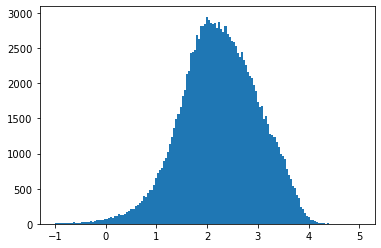

In [17]:
plt.hist(maxamp_df.apply(np.log10).values.flatten(), bins=np.linspace(-1, 5, 601//4))
''

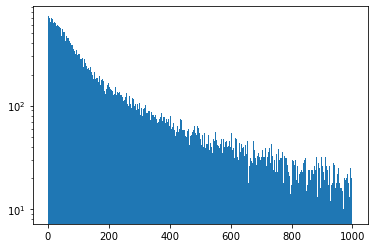

In [18]:
plt.hist(maxamp_df.values.flatten(), bins=np.linspace(0, 1000, 1000))
plt.yscale('log')

In [19]:
# eventdir = 'event1_day011/'
# eventdir = 'event2_day011/'

if event == 1:
    eventdir = 'event1_day011/'
elif event == 2:
    eventdir = 'event2_day011/'
elif event == 3:
    eventdir = 'event2_day011_10hz/'
else:
    raise ValueError('wtf is an event anyways')

In [20]:
lons = networkdf[networkdf.component == 'GHZ'].set_index('station').longitude
lats = networkdf[networkdf.component == 'GHZ'].set_index('station').latitude

def makefig(row):
    row = row[1]
    fig, ax = plt.subplots(figsize=(10, 10))
    time = str(row.name)
    row.name = 'maxamp'
    stations = row.index
    
    df = pd.DataFrame([row, lons, lats]).transpose()
    df['maxamp'] = df.maxamp.apply(np.log10)
    df.plot.scatter(ax=ax, x='longitude', y='latitude', s=np.exp(df.maxamp)*50
                    , c='maxamp', cmap='YlGnBu', edgecolor='black'
                    # , vmin=3.5, vmax=5, alpha=0.75)
                    , vmin=2, vmax=4, alpha=0.75)
    
    fig.text(s=time, x=0.15, y=0.15, fontsize=15)
    fig.savefig('/media/sda/data/borehole/maps/{}-ba1b.png'.format(eventdir+time), dpi=150, bbox_inches='tight')
    plt.close(fig)


In [21]:
rows = [row for row in maxamp_df.iterrows()]

from multiprocessing import Pool

pool = Pool(15)
pool.map(makefig, rows)
pool.close()

FileNotFoundError: [Errno 2] No such file or directory: '/media/sda/data/borehole/maps/event2_day011_10hz/2020-01-11 19:45:48+00:00-ba1b.png'

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

row = maxamp_df.iloc[31]
time = str(row.name)
row.name = 'maxamp'
stations = row.index

borehole_locs = networkdf[(networkdf.component=='GDH') & (networkdf.local_depth==35)]

A00 = borehole_locs[borehole_locs.station=='A00']
B00 = borehole_locs[borehole_locs.station=='B00']

ax.plot(A00.longitude, A00.latitude, marker='.', color='black')
ax.text(s='A00', x=A00.longitude+0.00002, y=A00.latitude, fontsize=12, zorder=0)

ax.plot(B00.longitude, B00.latitude, marker='.', color='black')
ax.text(s='B00', x=B00.longitude+0.00002, y=B00.latitude, fontsize=12, zorder=0)

lons = networkdf[networkdf.component == 'GHZ'].set_index('station').longitude
lats = networkdf[networkdf.component == 'GHZ'].set_index('station').latitude

ax.plot()

df = pd.DataFrame([row, lons, lats]).transpose()
df['maxamp'] = df.maxamp.apply(np.log10)
df.plot.scatter(ax=ax, x='longitude', y='latitude', s=np.exp(df.maxamp)*50, c='maxamp', cmap='YlGnBu', edgecolor='None', vmin=3.5, vmax=5, alpha=0.75)

fig.text(s=time, x=0.15, y=0.15, fontsize=15)

# fig.tight_layout()
